In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("nycflights_tratada.csv")
df.head()

,data_voo,companhia_formatted,id_voo_formatted,id_aeronave_formatted,datetime_partida_formatted,datetime_chegada_formatted,origem_formatted,destino_formatted,tempo_voo,distancia,tempo_voo_esperado,tempo_voo_hr,atraso,dia_semana,horario,flg_status
0,2013-01-01,UA,1545,N14228,2013-01-01 05:17:00,2013-01-01 08:30:00,EWR,IAH,227.0,1400.0,3.216667,3.783333,0.566667,1,MADRUGADA,ATRASO
1,2013-01-01,UA,1714,N24211,2013-01-01 05:33:00,2013-01-01 08:50:00,LGA,IAH,227.0,1416.0,3.283333,3.783333,0.500000,1,MADRUGADA,ONTIME
2,2013-01-01,DL,461,N668DN,2013-01-01 05:54:00,2013-01-01 08:12:00,LGA,ATL,116.0,762.0,2.300000,1.933333,-0.366667,1,MADRUGADA,ONTIME
3,2013-01-01,UA,1696,N39463,2013-01-01 05:54:00,2013-01-01 07:40:00,EWR,ORD,150.0,719.0,1.766667,2.500000,0.733333,1,MADRUGADA,ATRASO
4,2013-01-01,B6,507,N516JB,2013-01-01 05:55:00,2013-01-01 09:13:00,EWR,FLL,158.0,1065.0,3.300000,2.633333,-0.666667,1,MADRUGADA,ONTIME


In [3]:
df["data_voo"] = pd.to_datetime(df["data_voo"])
df["datetime_partida_formatted"] = pd.to_datetime(df["datetime_partida_formatted"])
df["datetime_chegada_formatted"] = pd.to_datetime(df["datetime_chegada_formatted"])
df["id_voo_formatted"] = df["id_voo_formatted"].astype(str)
df["dia_semana"] = df["dia_semana"].astype(str)

## Analise Exploratória

Distribuição da resposta

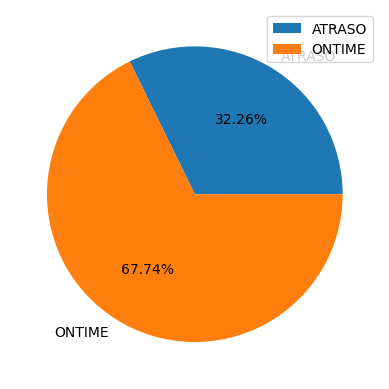

In [4]:
tmp = pd.DataFrame(df.groupby("flg_status").count())
tmp.plot.pie(y='distancia',
             autopct='%1.2f%%',
             ylabel='',
             fontsize=10);

In [5]:
df.describe()

,data_voo,datetime_partida_formatted,datetime_chegada_formatted,tempo_voo,distancia,tempo_voo_esperado,tempo_voo_hr,atraso
count,316605,316605,316605,316605.000000,316605.000000,316605.000000,316605.000000,316605.000000
mean,2013-07-03 06:18:01.142748416,2013-07-03 19:57:24.733027328,2013-07-03 22:12:32.416355072,151.593613,1053.883666,2.252134,2.526560,0.274426
min,2013-01-01 00:00:00,2013-01-01 05:17:00,2013-01-01 07:02:00,20.000000,80.000000,0.000000,0.333333,-1.000000
25%,2013-04-04 00:00:00,2013-04-04 21:23:00,2013-04-05 00:05:00,83.000000,509.000000,1.566667,1.383333,-0.483333
50%,2013-07-04 00:00:00,2013-07-04 12:37:00,2013-07-04 14:14:00,130.000000,888.000000,2.266667,2.166667,-0.316667
75%,2013-10-01 00:00:00,2013-10-01 21:23:00,2013-10-01 23:19:00,193.000000,1389.000000,2.866667,3.216667,0.650000
max,2013-12-31 00:00:00,2013-12-31 23:32:00,2014-01-01 01:20:00,695.000000,4983.000000,7.300000,11.583333,5.750000
std,NaN,NaN,NaN,94.564364,741.673085,0.799171,1.576073,1.104304


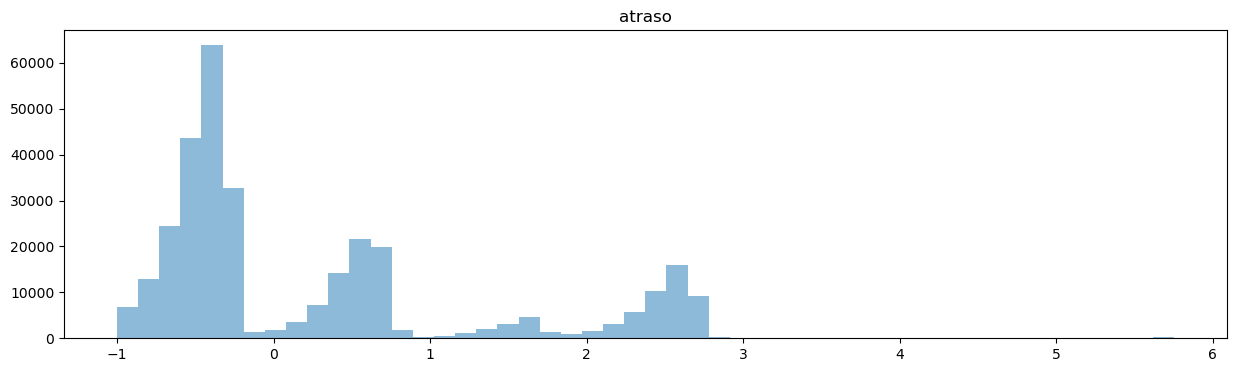

In [6]:
fig = plt.figure(figsize =(15, 4))
plt.hist(df['atraso'], alpha=0.5, bins = 50)
plt.title('atraso')
plt.show()

Será que existem companhias com uma frequência maior em atrasos ?

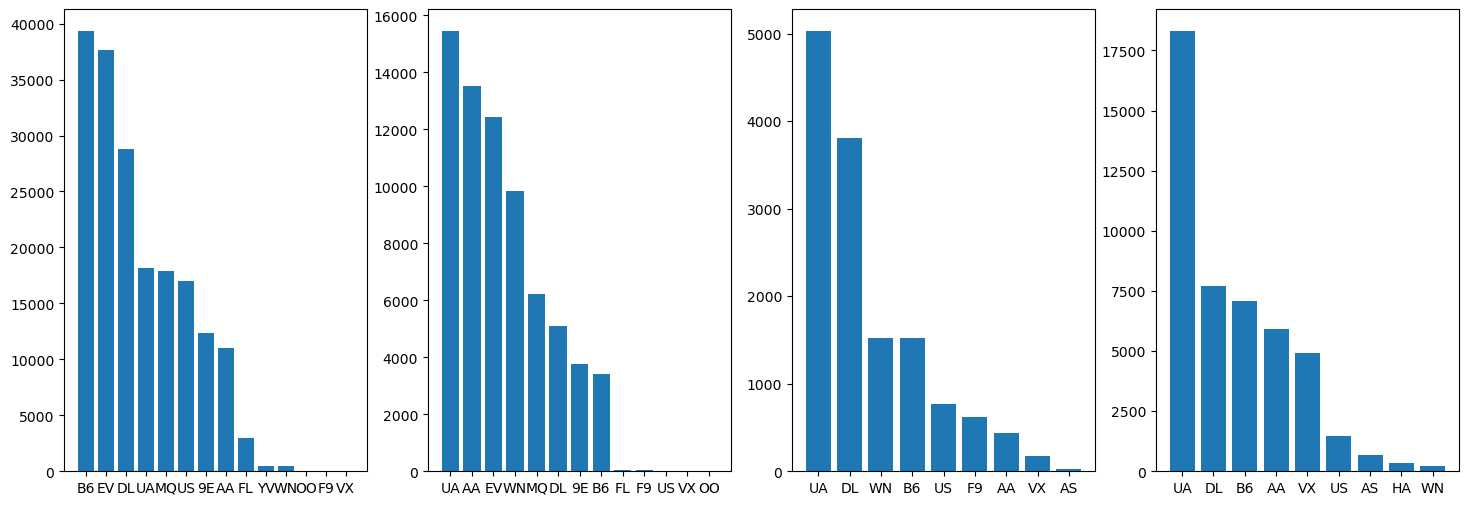

In [7]:
fig = plt.figure(1, figsize=(18,6))

ax = fig.add_subplot(1,4,1)
plt.bar(list(dict(df[df["atraso"]<0]['companhia_formatted'].value_counts()).keys()),
    list(dict(df[df["atraso"]<0]['companhia_formatted'].value_counts()).values()));

ax = fig.add_subplot(1,4,2)
plt.bar(list(dict(df[(df["atraso"]>=0) & (df["atraso"]<=1)]['companhia_formatted'].value_counts()).keys()),
    list(dict(df[(df["atraso"]>=0) & (df["atraso"]<=1)]['companhia_formatted'].value_counts()).values()));

ax = fig.add_subplot(1,4,3)
plt.bar(list(dict(df[(df["atraso"]>1) & (df["atraso"]<=2)]['companhia_formatted'].value_counts()).keys()),
    list(dict(df[(df["atraso"]>1) & (df["atraso"]<=2)]['companhia_formatted'].value_counts()).values()));

ax = fig.add_subplot(1,4,4)
plt.bar(list(dict(df[df["atraso"]>2]['companhia_formatted'].value_counts()).keys()),
    list(dict(df[df["atraso"]>2]['companhia_formatted'].value_counts()).values()));

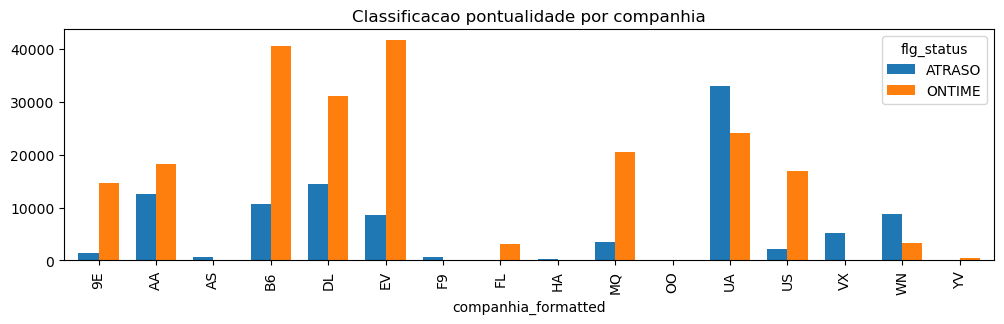

In [8]:
tmp = df.pivot_table(index="companhia_formatted", values='atraso', columns="flg_status", aggfunc="count").reset_index()
tmp.plot(x='companhia_formatted', kind='bar', stacked=False, 
         title='Classificacao pontualidade por companhia', 
         figsize=(12,3),
         width=.7,
         );

Será que existem origens com maior frequência de atrasos ?

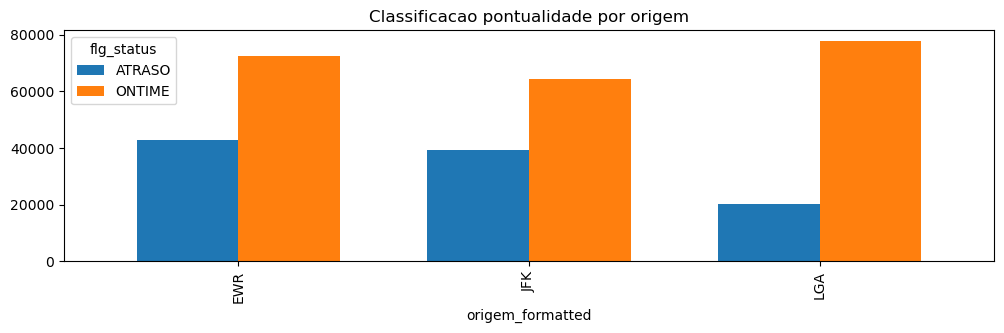

In [9]:
tmp = df.pivot_table(index="origem_formatted", values='atraso', columns="flg_status", aggfunc="count").reset_index()
tmp.plot(x='origem_formatted', kind='bar', stacked=False, 
         title='Classificacao pontualidade por origem', 
        figsize=(12,3),
         width=.7,
         );

Será que existe um período do dia com maior frequência de atrasos ?

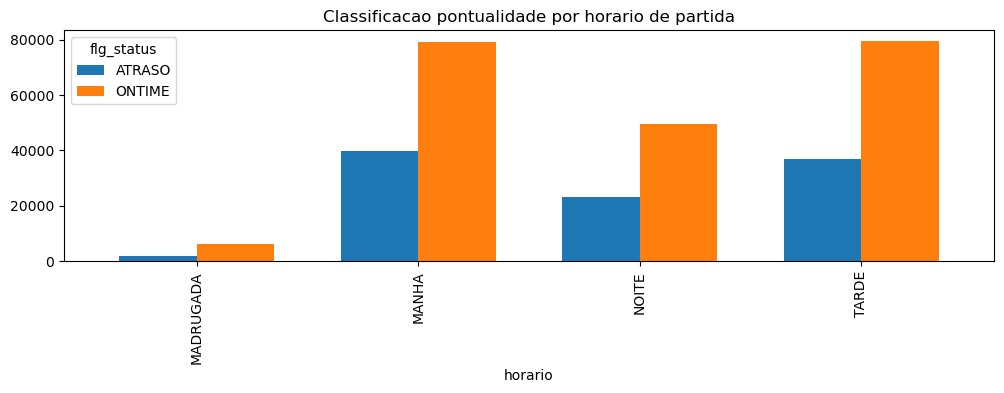

In [10]:
tmp = df.pivot_table(index="horario", values='atraso', columns="flg_status", aggfunc="count").reset_index()
tmp.plot(x='horario', kind='bar', stacked=False, 
         title='Classificacao pontualidade por horario de partida', 
         figsize=(12,3),
         width=.7,
         );

Será que existe um dia da semana com maior frequência de atrasos ?

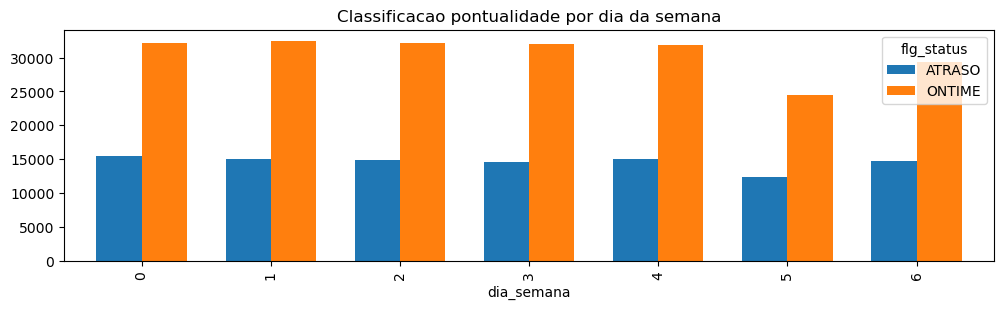

In [11]:
tmp = df.pivot_table(index="dia_semana", values='atraso', columns="flg_status", aggfunc="count").reset_index()
tmp.plot(x='dia_semana', kind='bar', stacked=False, 
         title='Classificacao pontualidade por dia da semana', 
         figsize=(12,3),
         width=.7,
         );

Será que existe relação entre atraso X dia da semana X horário ?

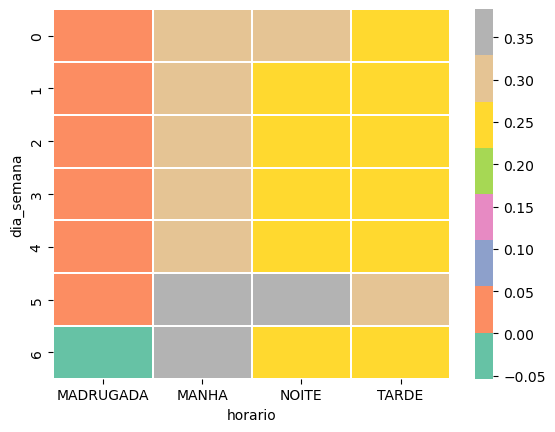

In [12]:
tmp = df.pivot_table(index="dia_semana", values='atraso', columns="horario", aggfunc="mean")
sns.heatmap(tmp, linewidths=0.01, cmap="Set2");

Será que existe relação entre atraso X companhia X destino ?

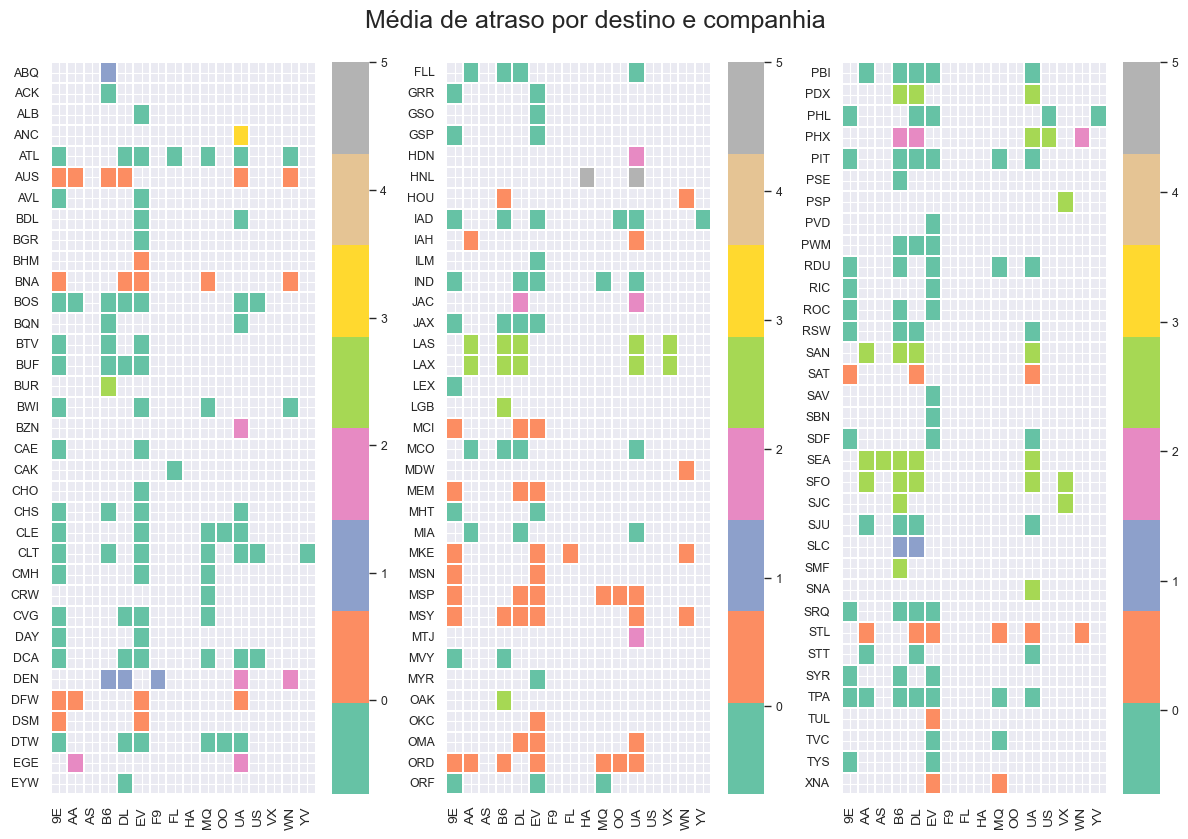

In [13]:
sns.set_theme(context="paper")
fig = plt.figure(1, figsize=(12,8))

tmp = df.pivot_table(index="destino_formatted", values='atraso', columns="companhia_formatted", aggfunc="mean")
tmp = tmp.reset_index().rename_axis(None, axis=1)
tmp.set_index("destino_formatted", drop = True, inplace = True)

ax = fig.add_subplot(1,3,1)
subset = tmp.iloc[:35,:]
sns.heatmap(subset, linewidths=0.01, cmap="Set2", vmax = 5)
plt.setp(ax.get_xticklabels(), fontsize=10, rotation = 90) ;
ax.yaxis.label.set_visible(False)

ax = fig.add_subplot(1,3,2)    
subset = tmp.iloc[35:70,:]
sns.heatmap(subset, linewidths=0.01, cmap="Set2", vmax = 5)
plt.setp(ax.get_xticklabels(), fontsize=10, rotation = 90) ;
ax.yaxis.label.set_visible(False)

ax = fig.add_subplot(1,3,3)    
subset = tmp.iloc[70:,:]
sns.heatmap(subset, linewidths=0.01, cmap="Set2", vmax = 5)
plt.setp(ax.get_xticklabels(), fontsize=10, rotation = 90) ;
ax.yaxis.label.set_visible(False)

fig.text(0.5, 1.02, "Média de atraso por destino e companhia", ha='center', fontsize = 18)

plt.tight_layout()

## ML Model

### Pré-processamento

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pickle

In [15]:
metrics = ['roc_auc', 'accuracy', 'precision', 'recall']

In [16]:
df.dtypes

data_voo                      datetime64[ns]
companhia_formatted                   object
id_voo_formatted                      object
id_aeronave_formatted                 object
datetime_partida_formatted    datetime64[ns]
datetime_chegada_formatted    datetime64[ns]
origem_formatted                      object
destino_formatted                     object
tempo_voo                            float64
distancia                            float64
tempo_voo_esperado                   float64
tempo_voo_hr                         float64
atraso                               float64
dia_semana                            object
horario                               object
flg_status                            object
dtype: object

In [17]:
exclude_cols = ["id_aeronave_formatted", "destino_formatted", "id_voo_formatted"]
categorical_cols = [c for c in df.columns if df[c].dtype == 'object' and c not in exclude_cols]
df_categorical = df[categorical_cols].copy()
for col in categorical_cols:
    if df_categorical[col].nunique() == 2:
        df_categorical[col], _ = pd.factorize(df_categorical[col])
    else:
        df_categorical = pd.get_dummies(df_categorical, columns=[col])

In [18]:
num_cols = [c for c in df.columns if df[c].dtype == 'float64' and c not in ["tempo_voo_esperado", "tempo_voo_hr", "tempo_voo"]]
df_std = pd.DataFrame(StandardScaler().fit_transform(df[num_cols]),columns=num_cols)

In [19]:
df_processed = pd.concat([df_std, df_categorical], axis=1)
df_processed.head()

,distancia,atraso,flg_status,companhia_formatted_9E,companhia_formatted_AA,companhia_formatted_AS,companhia_formatted_B6,companhia_formatted_DL,companhia_formatted_EV,companhia_formatted_F9,...,dia_semana_1,dia_semana_2,dia_semana_3,dia_semana_4,dia_semana_5,dia_semana_6,horario_MADRUGADA,horario_MANHA,horario_NOITE,horario_TARDE
0,0.466670,0.264638,0,False,False,False,False,False,False,False,...,True,False,False,False,False,False,True,False,False,False
1,0.488243,0.204268,1,False,False,False,False,False,False,False,...,True,False,False,False,False,False,True,False,False,False
2,-0.393548,-0.580541,1,False,False,False,False,True,False,False,...,True,False,False,False,False,False,True,False,False,False
3,-0.451525,0.415563,0,False,False,False,False,False,False,False,...,True,False,False,False,False,False,True,False,False,False
4,0.014988,-0.852206,1,False,False,False,True,False,False,False,...,True,False,False,False,False,False,True,False,False,False


In [20]:
df_processed.columns

Index(['distancia', 'atraso', 'flg_status', 'companhia_formatted_9E',
       'companhia_formatted_AA', 'companhia_formatted_AS',
       'companhia_formatted_B6', 'companhia_formatted_DL',
       'companhia_formatted_EV', 'companhia_formatted_F9',
       'companhia_formatted_FL', 'companhia_formatted_HA',
       'companhia_formatted_MQ', 'companhia_formatted_OO',
       'companhia_formatted_UA', 'companhia_formatted_US',
       'companhia_formatted_VX', 'companhia_formatted_WN',
       'companhia_formatted_YV', 'origem_formatted_EWR',
       'origem_formatted_JFK', 'origem_formatted_LGA', 'dia_semana_0',
       'dia_semana_1', 'dia_semana_2', 'dia_semana_3', 'dia_semana_4',
       'dia_semana_5', 'dia_semana_6', 'horario_MADRUGADA', 'horario_MANHA',
       'horario_NOITE', 'horario_TARDE'],
      dtype='object')

In [21]:
train_clas, test_clas = train_test_split(df_processed.drop("atraso", axis=1), test_size=0.3, random_state=50)
predictors_clas = [c for c in train_clas.columns if c not in ['flg_status', 'atraso']]

In [22]:
train_reg, test_reg = train_test_split(df_processed.drop("flg_status", axis=1), test_size=0.3, random_state=50)
predictors_reg = [c for c in train_reg.columns if c not in ['flg_status', 'atraso']]

### Classificação

In [23]:
clf_clas = DecisionTreeClassifier()
clf_clas.fit(train_clas[predictors_clas], train_clas['flg_status'])
y_pred_clas = clf_clas.predict(test_clas[predictors_clas]) #0.5
y_prob_clas = clf_clas.predict_proba(test_clas[predictors_clas])[:, 1]

In [24]:
y_pred_clas

array([1, 0, 0, ..., 0, 1, 1], dtype=int64)

In [25]:
results = list()
for m in metrics:
    if m == 'roc_auc':
        results.append((m, roc_auc_score(test_clas['flg_status'], y_prob_clas)))
    else:
        results.append((m, eval("{}_score".format(m))(test_clas['flg_status'], y_pred_clas)))
results

[('roc_auc', 0.9804118480261188),
 ('accuracy', 0.918131856562296),
 ('precision', 0.9518591185337608),
 ('recall', 0.9261535596219211)]

In [26]:
cm = confusion_matrix(test_clas['flg_status'], y_pred_clas)
especificidade = cm[0][0]/(cm[1][0]+cm[0][0])
sensibilidade = cm[1][1]/(cm[1][1]+cm[0][1])
print(sensibilidade, especificidade)

0.9518591185337608 0.8526524418568642


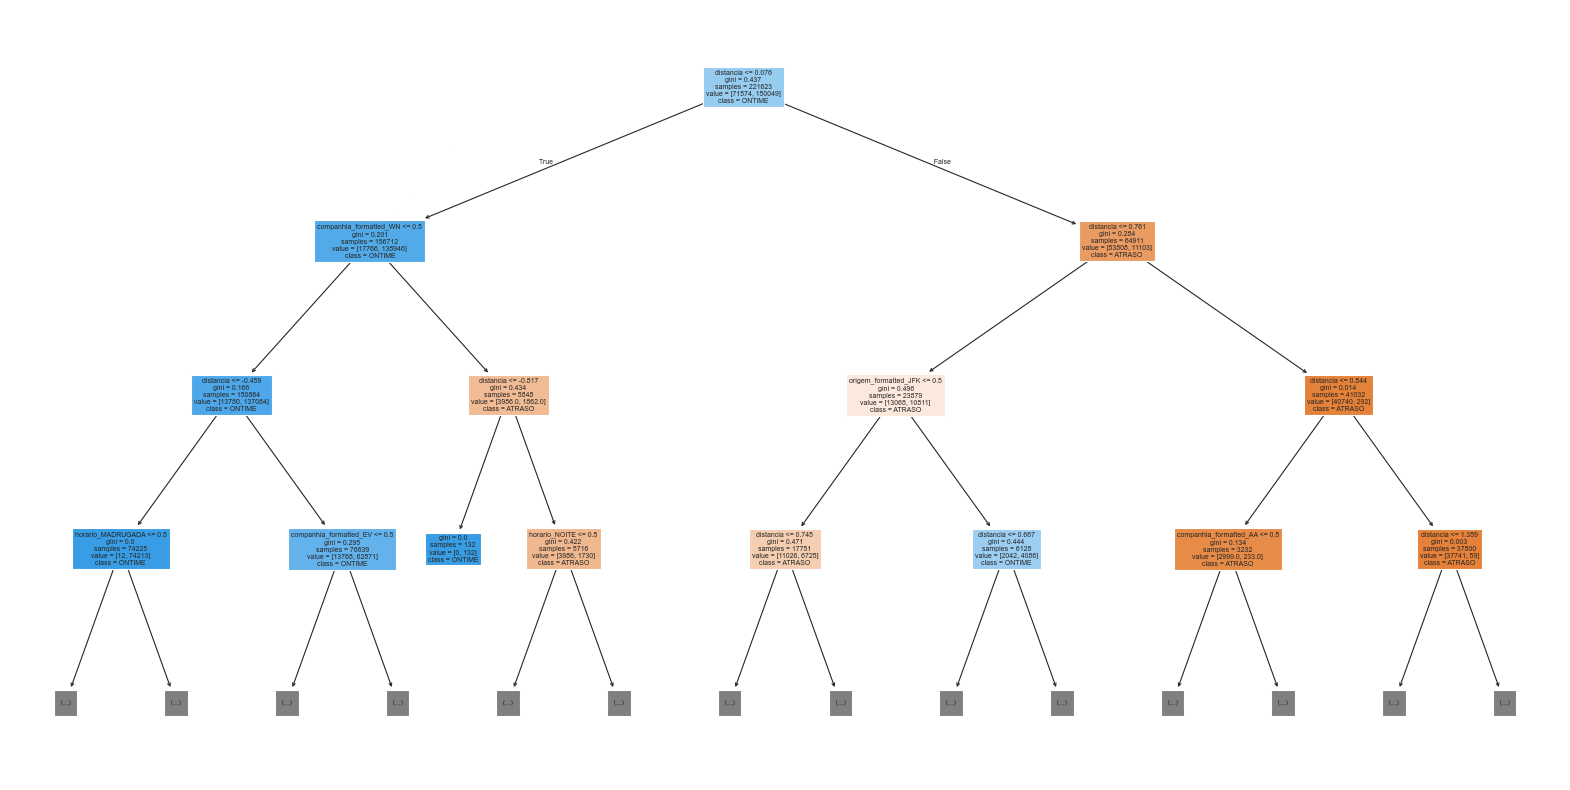

In [27]:
fig = plt.figure(figsize=(20,10))
_ = tree.plot_tree(clf_clas, 
                   max_depth = 3,
                   feature_names=predictors_clas,  
                   class_names=["ATRASO", "ONTIME"],
                   filled=True)

In [28]:
fig.savefig("decistion_tree.png")

### Regressão

In [29]:
clf_reg = LinearRegression()
clf_reg.fit(train_reg[predictors_reg], train_reg['atraso'])
y_pred_reg = clf_reg.predict(test_reg[predictors_reg])

In [30]:
y_pred_reg

array([-0.89569092,  0.48025513,  4.48069   , ...,  1.83807373,
       -0.55488586, -1.34312439])

In [31]:
mean_squared_error(test_reg["atraso"], y_pred_reg)

0.18605771286511452

In [32]:
r2_score(test_reg["atraso"], y_pred_reg)

0.815286097481452

In [33]:
(test_reg["atraso"] - y_pred_reg).describe()

count    94982.000000
mean        -0.001908
std          0.431342
min         -1.922406
25%         -0.302174
50%          0.015856
75%          0.320467
max          1.542561
Name: atraso, dtype: float64

In [35]:
#filename = 'reg_model.sav'
#pickle.dump(clf_reg, open(filename, 'wb'))
#clf_reg = pickle.load(open(filename, 'rb'))